In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.integrate
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.signal as signal
import random
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import utils
import h5py
import time
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
file=h5py.File('6292_skimTree.hdf5','r')



In [3]:
file.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = file.get('data')

In [7]:
print(data)

<HDF5 dataset "data": shape (110359,), type "|V73764">


In [5]:
data=np.asarray(data)

In [53]:
print(data[11018])

(6292, 13, 1562, [0.9135742 , 0.9135846 , 0.91448015, 0.91171646, 0.91399086, 0.9129598 , 0.9143324 , 0.91439134, 0.9132918 , 0.9132199 , 0.91381836, 0.9141065 , 0.9145274 , 0.91364545, 0.9146613 , 0.9145442 , 0.9155038 , 0.91481745, 0.9149176 , 0.91402537, 0.9133824 , 0.9137683 , 0.91361034, 0.91337144, 0.9146057 , 0.91322595, 0.91319174, 0.91354555, 0.91403806, 0.9137474 , 0.9124039 , 0.9127816 , 0.9141819 , 0.91430664, 0.91430664, 0.9146994 , 0.91463363, 0.91458523, 0.9136481 , 0.9131374 , 0.9133301 , 0.913487  , 0.91421986, 0.91488266, 0.9138484 , 0.9135042 , 0.91268337, 0.91418356, 0.91328895, 0.91361487, 0.91322535, 0.9149043 , 0.9130175 , 0.914062  , 0.91409516, 0.9147033 , 0.91414833, 0.9134105 , 0.9131117 , 0.91506416, 0.91373277, 0.9135742 , 0.9124447 , 0.9141871 , 0.91477287, 0.91431946, 0.9128507 , 0.91571903, 0.9131747 , 0.91491944, 0.91352886, 0.9153615 , 0.9138624 , 0.9128332 , 0.9143761 , 0.91516834, 0.91300714, 0.91322154, 0.91260326, 0.9140625 , 0.91419935, 0.91369617

(0.6, 1)

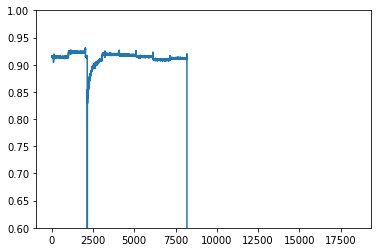

In [274]:
plt.plot(data[42][3])#,'bo')
#plt.xlim(0,7500)
plt.ylim(0.6,1)

In [8]:
print(data[11548])

(6292, 13, 2092, [0.9152832 , 0.9152712 , 0.9138108 , 0.91338176, 0.91553575, 0.9157361 , 0.91503906, 0.91500205, 0.9145066 , 0.9141642 , 0.91509604, 0.91555834, 0.9156714 , 0.9149329 , 0.91419524, 0.9137282 , 0.9145903 , 0.9148751 , 0.91511977, 0.91439086, 0.91475093, 0.9144129 , 0.9138664 , 0.91421217, 0.9145369 , 0.9137335 , 0.9142517 , 0.9140052 , 0.9136978 , 0.9137126 , 0.91465914, 0.9143791 , 0.9146281 , 0.91446763, 0.91381836, 0.9140882 , 0.9146449 , 0.91469675, 0.9145508 , 0.91476053, 0.91439635, 0.9142267 , 0.91481864, 0.91499823, 0.9142746 , 0.9141173 , 0.9148199 , 0.9137036 , 0.9140578 , 0.915041  , 0.91503376, 0.915174  , 0.9150157 , 0.9146799 , 0.9138848 , 0.91400427, 0.91413116, 0.9139773 , 0.9141709 , 0.914749  , 0.91458714, 0.9149119 , 0.91394174, 0.91357714, 0.9140625 , 0.9140625 , 0.9142204 , 0.9152783 , 0.9149427 , 0.9150583 , 0.91545534, 0.915177  , 0.91468245, 0.9141872 , 0.91461843, 0.9147949 , 0.9132593 , 0.91381544, 0.9146541 , 0.91559356, 0.91536796, 0.91507953

In [6]:
digitizer_arrays=[]

for val in data:
    digitizer_arrays.append(val[3][:8192])

[[0.91967773 0.91967773 0.91776645 ... 0.92041016 0.9204219  0.92090374]
 [0.91381836 0.9138226  0.91409826 ... 0.91916203 0.9182386  0.9172508 ]
 [0.91674805 0.91674805 0.9143708  ... 0.91797733 0.9181829  0.91697794]
 ...
 [0.9145508  0.9145423  0.9140068  ... 0.91658837 0.91745293 0.91868293]
 [0.9147949  0.9147949  0.91336673 ... 0.9174497  0.91678315 0.9179856 ]
 [0.9140625  0.9140601  0.9138151  ... 0.9158327  0.91791505 0.9174866 ]]


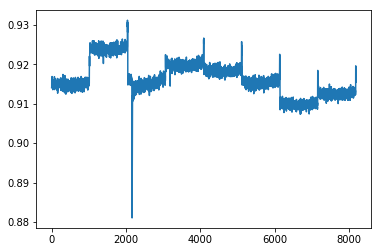

In [7]:
digitizer_arrays=np.asarray(digitizer_arrays)
print(digitizer_arrays)

plt.figure()
plt.plot(digitizer_arrays[39])

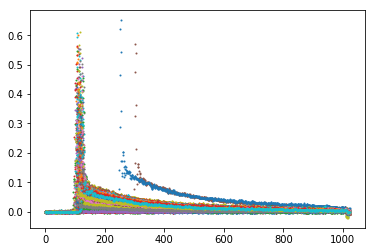

In [11]:
for i in range(200):
    plt.plot(-digitizer_arrays[i][2048:3072]+digitizer_arrays[i][2048], 'o', ms=1)


In [11]:
digitizer_arrays_avg=np.mean(digitizer_arrays, axis=0)

In [12]:
digitizer_arrays_avg.shape

(8192,)

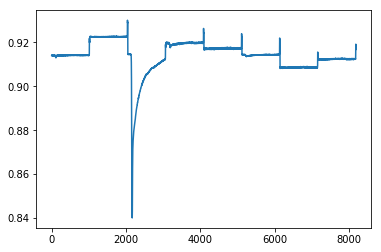

In [14]:

plt.plot(digitizer_arrays_avg)

Actually quite silly to look at thte average pulse shape bc the peaks of the pulses are not lined up at all. SO the peak looks small, just 0.07

Text(0.5,1,'avg pulse of channel 2 electrons at 200 GeV')

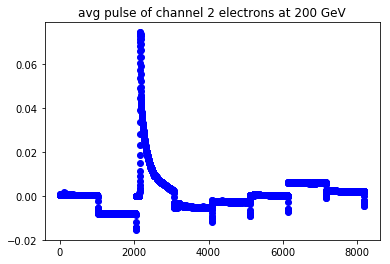

In [13]:
t=np.linspace(0,350,1024)
plt.plot((-digitizer_arrays_avg+digitizer_arrays_avg[2048]),'bo')

plt.title('avg pulse of channel 2 electrons at 200 GeV')
#plt.xlim(30,80)

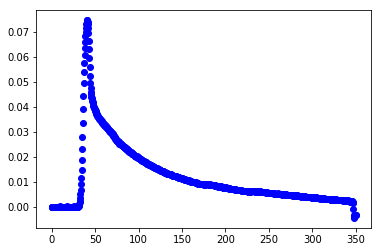

In [16]:
plt.plot(t,(-digitizer_arrays_avg[2048:3072]+digitizer_arrays_avg[2048]),'bo')

In [17]:
print(len(digitizer_arrays[0]))

8192


(35, 45)

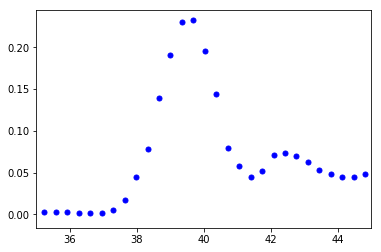

In [18]:
plt.plot(t,-digitizer_arrays[27][2048:3072]+digitizer_arrays[27][2048], 'bo', ms=5)
plt.xlim(35,45)

(100, 200)

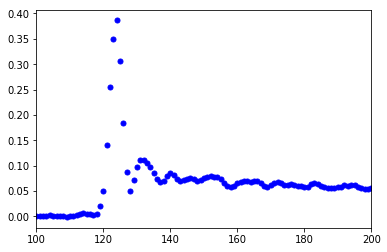

In [19]:
plt.plot(-digitizer_arrays[7][2048:3072]+digitizer_arrays[7][2048], 'bo', ms=5)
plt.xlim(100,200)

In [8]:
digitizer_channel_2=[]
for array in digitizer_arrays[:]:
    pedestal=array[2048]
    digitizer_channel_2.append(-array[2048:3072]+pedestal)

digitizer_channel_2=np.asarray(digitizer_channel_2)

110359


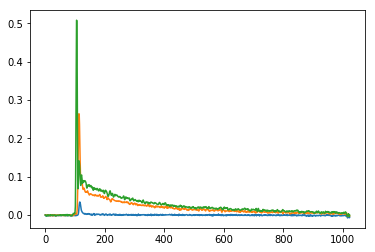

In [383]:
for array in digitizer_channel_2[39:42]:
    plt.plot(array)
    
print(len(digitizer_channel_2))

#plt.plot(digitizer_channel_2[10])

fuck
fuck
fuck
fuck
fuck
fuck
fuck


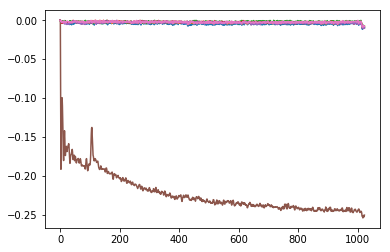

In [9]:
digitizer_channel_2_cut=[]
half_max_index=[]
for array in digitizer_channel_2:
    max_val=np.max(array)
    
    max_val_index=array.argmax()
    
    #print(max_val, max_val_index)
    half_val=max_val/2
    try:
        idx = (np.abs(array[:max_val_index] - half_val)).argmin()
        if idx < 200 and idx>100 and (np.abs(max_val_index-idx)<15) and (max_val>0.05):
        #plt.plot(array)
            half_max_index.append(idx)
            digitizer_channel_2_cut.append(array)
    except ValueError:
        print('fuck')
        plt.plot((array))
    #print (np.abs(array[:max_val_index] - half_val))
    #print(idx)
    #print(array[idx])
    
    
    
digitizer_channel_2_cut=np.asarray(digitizer_channel_2_cut)

101


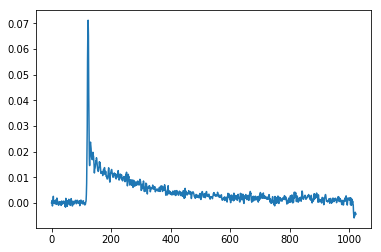

In [41]:
print(min(half_max_index))
plt.plot(digitizer_channel_2_cut[42])

In [28]:
#len(half_max_index)
len(digitizer_channel_2_cut)

80189

In [10]:
cut_vals=[]
min_of_half_max=min(half_max_index)
for i in half_max_index:
    cut_vals.append(i-min_of_half_max)

In [31]:
print((cut_vals[:]))

[13, 15, 14, 6, 2, 12, 20, 8, 9, 10, 9, 7, 15, 7, 13, 17, 3, 15, 9, 4, 12, 19, 9, 16, 14, 25, 11, 9, 2, 8, 1, 13, 12, 11, 5, 5, 8, 10, 3, 5, 21, 12, 19, 4, 21, 4, 5, 19, 14, 25, 1, 15, 24, 16, 11, 9, 10, 16, 17, 6, 23, 13, 24, 9, 23, 18, 11, 5, 14, 17, 3, 17, 5, 9, 1, 4, 15, 20, 10, 20, 10, 5, 10, 19, 7, 16, 15, 22, 19, 16, 9, 13, 22, 4, 7, 25, 3, 3, 9, 3, 13, 9, 12, 2, 13, 2, 15, 8, 3, 17, 11, 23, 10, 4, 14, 19, 9, 13, 17, 13, 5, 14, 18, 10, 4, 2, 12, 8, 20, 11, 20, 7, 17, 15, 11, 18, 20, 14, 15, 0, 13, 10, 15, 11, 8, 13, 23, 1, 7, 21, 14, 3, 14, 27, 0, 2, 5, 17, 22, 13, 10, 16, 7, 17, 6, 10, 14, 8, 11, 25, 17, 16, 20, 14, 5, 10, 7, 6, 22, 12, 11, 5, 16, 13, 9, 8, 22, 10, 15, 8, 23, 23, 23, 8, 8, 18, 7, 15, 7, 8, 26, 9, 9, 16, 8, 9, 2, 10, 16, 13, 20, 13, 1, 9, 23, 2, 5, 18, 9, 5, 3, 3, 21, 13, 17, 2, 13, 12, 5, 10, 15, 8, 14, 4, 13, 18, 7, 4, 3, 11, 11, 21, 5, 3, 10, 11, 13, 0, 8, 11, 15, 13, 19, 5, 15, 21, 5, 8, 12, 10, 6, 13, 5, 25, 25, 20, 15, 15, 8, 14, 17, 6, 15, 6, 7, 19, 3, 2,

0.37915546
0.3883527
0.11485803
0.40966362
0.37091225
0.22958732
0.3866428
0.06462848
0.35925674
0.43836385
0.09887695
0.33662105
0.29767692
0.5557648
0.4110611
0.2363478
0.5614518
0.2948274
0.55193484
0.3975472
0.2325995
0.21875262
0.23803973
0.06979948
0.056985557
0.4250277
0.6116375
0.2638232
0.5076343
0.41524768
0.5004916
0.24623781
0.06434256
0.4794414
0.23479098
0.36532843
0.19501114
0.05771917
0.26404762
0.07278854
0.3681383
0.09214294
0.07115948
0.4230946
0.13395649
0.3413744
0.4529223
0.35383624
0.49132064
0.22616994
0.08788538
0.23159552
0.31392545
0.3248604
0.14920354
0.10691863
0.53547394
0.2185595
0.340119
0.44149747
0.35211438
0.15311176
0.4551959
0.38278103
0.09740853
0.2282508
0.5285779
0.2564935
0.4002266
0.44923434
0.3333069
0.2775374
0.4525417
0.24462628
0.09898865
0.60710615
0.25974375
0.10688841
0.20259458
0.5208428
0.14198709
0.27370507
0.3427738
0.108392656
0.5993308
0.3182987
0.11322534
0.26887995
0.50062436
0.35317504
0.39152652
0.3956272
0.088345945
0.12780702

(0, 200)

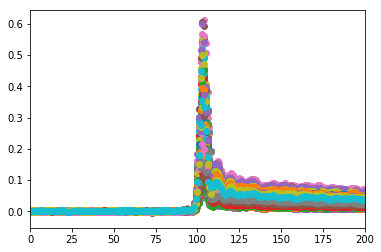

In [42]:
for i in range(len(digitizer_channel_2_cut[:100])):
    assert len(digitizer_channel_2_cut)==len(cut_vals)
    print(max(digitizer_channel_2_cut[i]))
    plt.plot(digitizer_channel_2_cut[i][cut_vals[i]:],'o')

plt.xlim(0,200)

In [22]:
digitizer_channel_2_cut[2][cut_vals[2]:]

array([ 5.43141365e-03,  1.94559097e-02,  3.27694416e-02,  7.28144646e-02,
        9.39712524e-02,  1.14858031e-01,  1.12967789e-01,  9.03080106e-02,
        7.05584288e-02,  4.72984910e-02,  3.79271507e-02,  3.60481739e-02,
        3.48960161e-02,  3.67885232e-02,  3.77275348e-02,  3.82041335e-02,
        3.51802111e-02,  3.14036608e-02,  2.75142193e-02,  2.64337063e-02,
        2.76448131e-02,  2.95781493e-02,  3.03854346e-02,  3.10232639e-02,
        3.02041173e-02,  2.93425918e-02,  2.90170908e-02,  2.80350447e-02,
        2.88661122e-02,  2.83877254e-02,  2.81601548e-02,  2.86417603e-02,
        2.92968750e-02,  2.98174024e-02,  3.10774446e-02,  3.12500000e-02,
        3.03759575e-02,  2.75542140e-02,  2.54909992e-02,  2.30113268e-02,
        2.12306380e-02,  2.22534537e-02,  2.35121846e-02,  2.49539614e-02,
        2.59425044e-02,  2.48191357e-02,  2.31563449e-02,  2.33111382e-02,
        2.53779888e-02,  2.34848261e-02,  2.38879919e-02,  2.35077143e-02,
        2.46021748e-02,  

In [11]:
digitizer_channel_2_cut[68690]
cut_vals[68690]

13

In [11]:
aligned_digitizer_channel_2_cut=[]
lengths=[]

for i in range(len(digitizer_channel_2_cut)):
    lengths.append(len(digitizer_channel_2_cut[i][cut_vals[i]:]))


min_length=min(lengths)



for i in range(len(digitizer_channel_2_cut)):
    assert len(digitizer_channel_2_cut)==len(cut_vals)
    array=digitizer_channel_2_cut[i][cut_vals[i]:cut_vals[i]+min_length]
    aligned_digitizer_channel_2_cut.append(array[:])
    

In [13]:
print(min(lengths))

927


In [13]:
aligned_digitzer_channel_2_cut=np.asarray(aligned_digitizer_channel_2_cut)
#print((aligned_digitzer_channel_2_cut[789]))

In [14]:
x=7.5e-2
round(x,2)

0.07

In [22]:
start_index=[]
for j, array in enumerate(aligned_digitzer_channel_2_cut):
    for i, val in enumerate(array):
        #print(round(val,1))
        if abs(round(val,2))>0.1:
            start_index.append(i-1)
            if i-1==53:
                print(j)
            if i-1==23:
                print('o')
                print(j)
            break

    
        

o
44520
79813


In [23]:
#print(start_index)
min_start_index=int(min(start_index))
print(min_start_index)

23


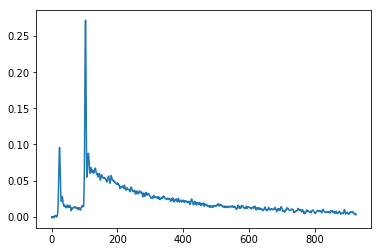

In [24]:
for i, array in enumerate(aligned_digitzer_channel_2_cut[44520:44521]):
    plt.plot(array)
    
    
#plt.xlim(-1,100)

101


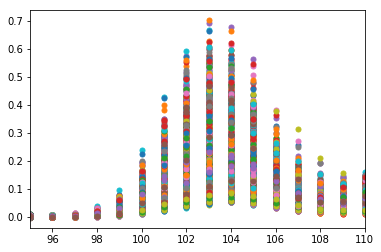

In [21]:








for array in aligned_digitizer_channel_2_cut[0:686]:
    
    #print(len(array))
    plt.plot(array, 'o', ms=5)

plt.xlim(95,110)

print(min_of_half_max)

In [346]:
t=np.arange(0,350,0.4)

In [347]:
print(len(t))

875


Unsure which the dt is. 1/2.5GHz is 0.4 ns per point. but 1024 samples for 350 ns is not conistent with that. Doesn't realy matter as long as im consistent

In [15]:

dt=0.4
print(dt*15)

6.0


In [16]:
prelim_percentage=[]


for array in aligned_digitzer_channel_2_cut:
    
    cerenkov=np.trapz(array[min_of_half_max-4:min_of_half_max+10], dx=dt)
    scint=np.trapz(array[min_of_half_max+10:], dx=dt)
    
    prelim_percentage.append([cerenkov, scint])

In [17]:
prelim_percentage=np.asarray(prelim_percentage)

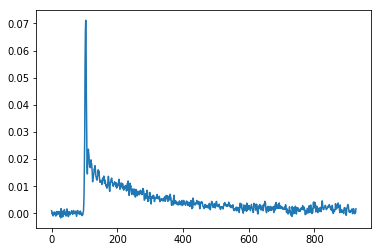

In [27]:
#print(prelim_percentage[:])
plt.plot(aligned_digitzer_channel_2_cut[42])

In [20]:
'''
for i in range(len(aligned_digitzer_channel_2_cut)):
    if len(aligned_digitzer_channel_2_cut[i])!=830:
        print((aligned_digitzer_channel_2_cut[i]))
        print(i)
'''
    
    
    
aligned_digitzer_channel_2_cut_avg=np.mean(aligned_digitzer_channel_2_cut, axis=0)
print(len(aligned_digitzer_channel_2_cut[0]))

927


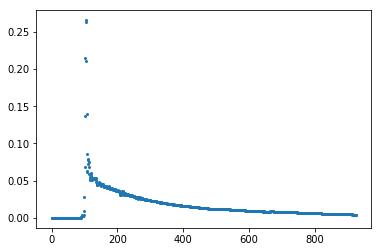

In [21]:
plt.plot(aligned_digitzer_channel_2_cut_avg, 'o', ms=2)
#plt.ylim(-8,0)
#plt.xlim(0,15)



In [24]:
def fit_func(x, A, B, tau_1, tau_2):
    return A*np.exp(-(x)/tau_1) +B*np.exp(-(x)/tau_2)


In [25]:
xdata=np.arange(0,len(aligned_digitzer_channel_2_cut_avg)*0.4,0.4)
ydata=aligned_digitzer_channel_2_cut_avg

#print(xdata[13:])

popt, pcov = sp.optimize.curve_fit(fit_func, xdata[min_of_half_max+10:], ydata[min_of_half_max+10:] , p0=(0.26, 0.74,55,145))

In [26]:
print(popt)
len(fit_func(xdata[13:], *popt))
len(ydata[13:])

[1.17793501e-01 4.20837837e-02 3.16260850e+01 1.63582174e+02]


914

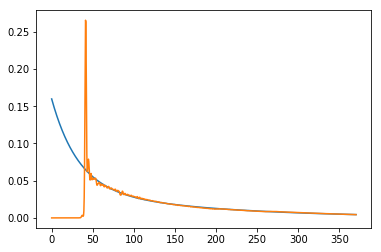

In [27]:
#for array in aligned_digitizer_channel_2_cut[:5]:
    
    #plt.plot(xdata, array, 'o', ms=5)
plt.plot(xdata, fit_func(xdata, *popt))# , linewidth=7)
plt.plot(xdata, aligned_digitzer_channel_2_cut_avg) #,  linewidth=7)


In [28]:
yvals=fit_func(xdata[:], *popt)

b=sp.integrate.trapz(yvals[min_of_half_max+10:], xdata[min_of_half_max+10:])
c=sp.integrate.trapz(yvals[min_of_half_max-4:], xdata[min_of_half_max-4:])
a=b/c
print(a)

0.9380074817806967


In [29]:
adjusted_percentages=[]
for percents in prelim_percentage:
    
    cerenkov=percents[0]
    scint=percents[1]
    adjusted_cerenkov=cerenkov-(scint*((1/a)-1))
    adjusted_scint=scint/a
    total=adjusted_cerenkov+adjusted_scint
    adjusted_percentages.append([adjusted_cerenkov/total, adjusted_scint/total])
    

In [30]:
adjusted_percentages=np.asarray(adjusted_percentages)

[[0.07482949 0.92517051]
 [0.05533275 0.94466725]
 [0.03647193 0.96352807]
 ...
 [0.0446794  0.9553206 ]
 [0.04114309 0.95885691]
 [0.0473372  0.9526628 ]]
[1.0318495 6.7743616]


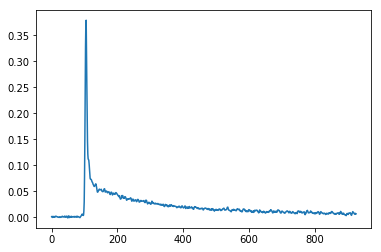

In [31]:
print(adjusted_percentages)
print(prelim_percentage[0])
plt.plot(aligned_digitzer_channel_2_cut[0])

In [ ]:
def model_creator():
    model = Sequential()
    #model.add(Dense(50,  input_shape=(300,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, input_shape=(100,), kernel_initializer='ones', activation='relu'))
    model.add(Dense(2, kernel_initializer='ones', activation='relu'))
# Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def model_trainer(model_name, pre_X, Y):
    model=model_creator()
        
    

    Y=np.asarray(Y)
    X=[]
    for val in pre_X:
        temp, bin_edges=np.histogram(val, bins=100)
        X.append(temp)
        print(temp)
    X=np.asarray(X)
    print(X.shape)
    norm_factor=np.amax(X)
    X_scaled=X/norm_factor
    Xtrain, Xval, Ytrain, Yval = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
    checkpointer = ModelCheckpoint(filepath=model_name+"weights.hdf5",verbose=3, save_best_only=True)
    earlystop= EarlyStopping(monitor='val_loss', min_delta=0, patience=20 ,verbose=1, mode='auto')
    history=model.fit(Xtrain,Ytrain,epochs=200,verbose=1
                             ,validation_data=(Xval,Yval)
                             ,shuffle=True, batch_size=16
                             ,callbacks=[earlystop,checkpointer])
    model.save(model_name)
    return model, history



In [ ]:
model, history= model_trainer('thirdtry_percentage',aligned_digitzer_channel_2_cut, adjusted_percentages)

In [49]:
test, bins=np.histogram(aligned_digitzer_channel_2_cut[0], bins=100) #, range=(0,350))
print(aligned_digitzer_channel_2_cut[0])
test=[test]
test=np.asarray(test)
print(test)

p=model.predict(test)
print(p)

[ 1.37269497e-03  1.03133917e-03 -1.35898590e-04  1.87611580e-03
  1.25819445e-03  9.07301903e-04  4.62710857e-04  1.92040205e-03
  1.21146441e-03  3.28361988e-04  5.55872917e-04  1.64300203e-03
  1.60700083e-03  2.36785412e-03  1.92034245e-03  1.51699781e-03
  1.16711855e-03  8.69393349e-04  1.09761953e-03  5.00261784e-04
  3.45528126e-04  5.09202480e-04  2.71797180e-05  4.96029854e-04
  6.38425350e-04 -8.44597816e-05  6.85513020e-04  4.94182110e-04
  3.88026237e-05  4.88281250e-04  5.78582287e-04  1.17474794e-03
  2.12663412e-03  2.01863050e-03  1.05684996e-03  9.68813896e-04
  1.01327896e-03  5.72264194e-04  1.68132782e-03  1.42592192e-03
  2.32481956e-03  1.38747692e-03  1.59561634e-03  3.36945057e-04
  6.90698624e-04  8.22007656e-04  2.55560875e-03  1.70898438e-03
  1.44773722e-03 -1.04492903e-03  1.45453215e-03  1.24847889e-03
  2.91168690e-03 -3.54886055e-04  1.56223774e-03 -5.98430634e-05
  1.04498863e-03  5.94317913e-04  1.70707703e-03  9.66310501e-04
  2.07293034e-03  9.59217

In [46]:
print((2*(p-adjusted_percentages[:100])/(p+adjusted_percentages[:100]))*100)

[[-200.          198.8586569 ]
 [-200.          198.83467468]
 [-200.          198.81147743]
 [-200.          198.82081829]
 [-200.          198.80811531]
 [-200.          198.80731156]
 [-200.          198.80548006]
 [-200.          198.89207213]
 [-200.          198.81678296]
 [-200.          198.83602264]
 [-200.          198.79785119]
 [-200.          198.80438808]
 [-200.          198.81545466]
 [-200.          198.83881163]
 [-200.          198.83767466]
 [-200.          198.80794803]
 [-200.          198.90339896]
 [-200.          198.81649407]
 [-200.          198.83267505]
 [-200.          198.81783878]
 [-200.          198.83182207]
 [-200.          198.7949144 ]
 [-200.          198.80814712]
 [-200.          198.80141427]
 [-200.          198.85479603]
 [-200.          198.81876719]
 [-200.          198.82539551]
 [-200.          198.82697861]
 [-200.          198.82494477]
 [-200.          198.81815787]
 [-200.          198.83034754]
 [-200.          198.81171046]
 [-200. 

In [363]:
(1/2.5e9)

4e-10

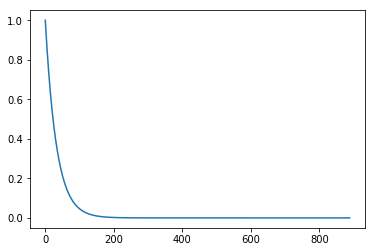

In [364]:
plt.plot(1*np.exp(-(xdata[13:]-5.2)/13))

In [53]:
len(aligned_digitzer_channel_2_cut[0])

927

In [66]:
import scipy.interpolate
import scipy.ndimage

def congrid(a, newdims, method='linear', centre=False, minusone=False):
    '''Arbitrary resampling of source array to new dimension sizes.
    Currently only supports maintaining the same number of dimensions.
    To use 1-D arrays, first promote them to shape (x,1).
    
    Uses the same parameters and creates the same co-ordinate lookup points
    as IDL''s congrid routine, which apparently originally came from a VAX/VMS
    routine of the same name.

    method:
    neighbour - closest value from original data
    nearest and linear - uses n x 1-D interpolations using
                         scipy.interpolate.interp1d
    (see Numerical Recipes for validity of use of n 1-D interpolations)
    spline - uses ndimage.map_coordinates

    centre:
    True - interpolation points are at the centres of the bins
    False - points are at the front edge of the bin

    minusone:
    For example- inarray.shape = (i,j) & new dimensions = (x,y)
    False - inarray is resampled by factors of (i/x) * (j/y)
    True - inarray is resampled by(i-1)/(x-1) * (j-1)/(y-1)
    This prevents extrapolation one element beyond bounds of input array.
    '''
    if not a.dtype in [n.float64, n.float32]:
        a = n.cast[float](a)

    m1 = n.cast[int](minusone)
    ofs = n.cast[int](centre) * 0.5
    old = n.array( a.shape )
    ndims = len( a.shape )
    if len( newdims ) != ndims:
        print "[congrid] dimensions error. " \
              "This routine currently only support " \
              "rebinning to the same number of dimensions."
        return None
    newdims = n.asarray( newdims, dtype=float )
    dimlist = []

    if method == 'neighbour':
        for i in range( ndims ):
            base = n.indices(newdims)[i]
            dimlist.append( (old[i] - m1) / (newdims[i] - m1) \
                            * (base + ofs) - ofs )
        cd = n.array( dimlist ).round().astype(int)
        newa = a[list( cd )]
        return newa

    elif method in ['nearest','linear']:
        # calculate new dims
        for i in range( ndims ):
            base = n.arange( newdims[i] )
            dimlist.append( (old[i] - m1) / (newdims[i] - m1) \
                            * (base + ofs) - ofs )
        # specify old dims
        olddims = [n.arange(i, dtype = n.float) for i in list( a.shape )]

        # first interpolation - for ndims = any
        mint = scipy.interpolate.interp1d( olddims[-1], a, kind=method )
        newa = mint( dimlist[-1] )

        trorder = [ndims - 1] + range( ndims - 1 )
        for i in range( ndims - 2, -1, -1 ):
            newa = newa.transpose( trorder )

            mint = scipy.interpolate.interp1d( olddims[i], newa, kind=method )
            newa = mint( dimlist[i] )

        if ndims > 1:
            # need one more transpose to return to original dimensions
            newa = newa.transpose( trorder )

        return newa
    elif method in ['spline']:
        oslices = [ slice(0,j) for j in old ]
        oldcoords = n.ogrid[oslices]
        nslices = [ slice(0,j) for j in list(newdims) ]
        newcoords = n.mgrid[nslices]

        newcoords_dims = range(n.rank(newcoords))
        #make first index last
        newcoords_dims.append(newcoords_dims.pop(0))
        newcoords_tr = newcoords.transpose(newcoords_dims)
        # makes a view that affects newcoords

        newcoords_tr += ofs

        deltas = (n.asarray(old) - m1) / (newdims - m1)
        newcoords_tr *= deltas

        newcoords_tr -= ofs

        newa = scipy.ndimage.map_coordinates(a, newcoords)
        return newa
    else:
        print "Congrid error: Unrecognized interpolation type.\n", \
              "Currently only \'neighbour\', \'nearest\',\'linear\',", \
              "and \'spline\' are supported."
        return None

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("[congrid] dimensions error. "               "This routine currently only support "               "rebinning to the same number of dimensions.")? (<ipython-input-66-2cd6910f5c42>, line 38)

In [58]:
b=rebin(aligned_digitzer_channel_2_cut[0],(100,))

In [59]:
print(b)

[ 1.37269497e-03  3.28361988e-04  1.09761953e-03  4.94182110e-04
  5.72264194e-04  2.55560875e-03 -5.98430634e-05  1.32179260e-03
  1.04922056e-03  7.52091408e-04  5.73259592e-03  1.50328219e-01
  1.12282276e-01  7.30994940e-02  5.95754981e-02  4.87011671e-02
  5.30151129e-02  5.00762463e-02  5.06027937e-02  4.61784601e-02
  4.30737138e-02  4.66536283e-02  4.10867929e-02  3.78331542e-02
  3.95337939e-02  3.51555347e-02  3.69591713e-02  3.11876535e-02
  3.06720138e-02  2.96099782e-02  3.10058594e-02  3.33019495e-02
  2.90389061e-02  3.11599970e-02  2.71605253e-02  2.62744427e-02
  2.40073204e-02  2.12756395e-02  2.34308839e-02  2.19726562e-02
  2.08985806e-02  1.90778375e-02  2.11620331e-02  2.07144618e-02
  1.96750164e-02  1.84745789e-02  1.83305740e-02  2.06829906e-02
  1.71764493e-02  1.62299275e-02  1.57579184e-02  1.61132812e-02
  1.43637061e-02  1.58904791e-02  1.55386329e-02  1.59339309e-02
  1.46762729e-02  1.41929388e-02  1.71113014e-02  1.06828213e-02
  1.37983561e-02  1.67062

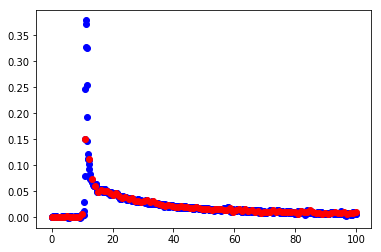

In [65]:
t1=np.linspace(0,100,927)
t2=np.linspace(0,100,100)

plt.plot(t1,aligned_digitzer_channel_2_cut[0], 'bo')
plt.plot(t2, b,'ro')

In [69]:
class DataObject:
    
    
    
    
    
    def __init__(self, filename):
        data=

In [70]:
DataObject('h')

2
